In [1]:
using FileIO, Images, JLD, Statistics

┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1273
  likely near C:\Users\SarnayakPC\.julia\packages\Images\RUVAg\src\Images.jl:60
┌ Info: Precompiling JLD [4138dd39-2aa7-5051-a626-17a0bb65d9c8]
└ @ Base loading.jl:1273


In [2]:
TRAIN_IMAGES_DIR = "train/"
TEST_IMAGES_DIR = "test/"

"test/"

In [3]:
function images_in_dir(DIR::String)
    images = String[]
    for file in readdir(DIR)
        if endswith(file, ".jpg")
            push!(images, joinpath(DIR, file))
        end
    end
    return images
end

images_in_dir (generic function with 1 method)

In [4]:
function load_image(path::String)
    img = load(path)
    arr = channelview(img)
    return (permuteddimsview(arr, [2, 3, 1]))
end

load_image (generic function with 1 method)

In [5]:
train_images = images_in_dir(TRAIN_IMAGES_DIR)
test_images = images_in_dir(TEST_IMAGES_DIR)

4000-element Array{String,1}:
 "test/000940378805c44108d287872b2f04ce.jpg"
 "test/0017242f54ececa4512b4d7937d1e21e.jpg"
 "test/001ee6d8564003107853118ab87df407.jpg"
 "test/002e175c3c1e060769475f52182583d0.jpg"
 "test/0036e44a7e8f7218e9bc7bf8137e4943.jpg"
 "test/0038ed6f7417b8275b393307f66cb1e3.jpg"
 "test/0059dfa41de4441fc23b9a4b98ba99cb.jpg"
 "test/0061bd302d735db829418cb90b4e6040.jpg"
 "test/00754573d8c7223e73da553dd43780bd.jpg"
 "test/008d9fce71c8e03a4c9cdd15ea908573.jpg"
 "test/00a36d4d6d152404670276fc983273bc.jpg"
 "test/00b706122b87e0fa275ff59e39d4d94b.jpg"
 "test/00c054da839d5518e59790f7d867f317.jpg"
 ⋮                                          
 "test/ff680e4f9bb7283eaf4cbc7530099657.jpg"
 "test/ff6d1ceccb9e19e750fc7e2c637c3c83.jpg"
 "test/ff6f8ae36c1d66214127fe5008789407.jpg"
 "test/ff7403812efdc9ec93301c32e8f39c30.jpg"
 "test/ff8bc1e0fe61fba8ea9a05c91cd0933a.jpg"
 "test/ff9937f41664d329822e72c6a14d3f16.jpg"
 "test/ff9c0bafab5f89febd18c1d6865c079b.jpg"
 "test/ffaafd0c9f2f0e7317

In [6]:
function load_all_images(paths_vector)
    images_vector = Array{Float32}(undef, 32, 32, 3, 0)
    i = 0
    for image_file in paths_vector
        images_vector = cat(images_vector, load_image(image_file), dims=4)
        i += 1
        if i%100==0
            println(string("Processing image no. ", i, " in thread ", Threads.threadid()))
        end
    end
    return images_vector
end

load_all_images (generic function with 1 method)

In [7]:
function load_images_parallel(paths_vector, num_bins)
    len = length(paths_vector) # Number of images
    bin_size = floor(UInt, len/num_bins) # Size of each bin
    all_bins = Vector{String}[] # To store image filenames in each bin
    # Create bins of images filenames
    for bin=1:num_bins-1
        paths_bin = paths_vector[(bin-1)*bin_size+1 : bin*bin_size]
        push!(all_bins, paths_bin)
    end
    # Add last bin with all extra images
    push!(all_bins, paths_vector[(num_bins-1)*bin_size+1 : len])
    bins = Vector{Array{Float32, 4}}(undef, num_bins) # To store bins of actual image arrays
    # Load each bin - multithreaded
    Threads.@threads for i = 1:num_bins
        bins[i] = load_all_images(all_bins[i])
    end
    # single array to store all images
    images_array = Array{Float32}(undef, 32, 32, 3, 0)
    # Concatenate all bins into single array
    for bin in bins
        images_array = cat(images_array, bin, dims=4)
    end
    return images_array
end

load_images_parallel (generic function with 1 method)

In [1]:
Threads.nthreads()

6

In [2]:
test_images = sort(test_images)
train_images = sort(train_images)

UndefVarError: UndefVarError: test_images not defined

In [10]:
test_X_orig = load_images_parallel(test_images, 10)

Error encountered while loading "D:\\DEV\\Julia\\Neural-Network-Julia\\Examples\\Cactus\\test\\326aa107b08bffc5d871ccd8204821e6.jpg".
Error encountered while loading "D:\\DEV\\Julia\\Neural-Network-Julia\\Examples\\Cactus\\test\\ce01427a36dd8cdf44b6eeb77b50fb67.jpg".
Error encountered while loading "D:\\DEV\\Julia\\Neural-Network-Julia\\Examples\\Cactus\\test\\e747de9dbf3428e391449489dee3edcc.jpg".

Fatal error:

Fatal error:
Error encountered while loading "D:\\DEV\\Julia\\Neural-Network-Julia\\Examples\\Cactus\\test\\000940378805c44108d287872b2f04ce.jpg".

Fatal error:

Fatal error:


TaskFailedException: TaskFailedException:
concurrency violation detected
Stacktrace:
 [1] handle_error(::ErrorException, ::File{DataFormat{:JPEG}}) at C:\Users\SarnayakPC\.julia\packages\FileIO\Glbhe\src\error_handling.jl:82
 [2] handle_exceptions(::Array{Any,1}, ::String) at C:\Users\SarnayakPC\.julia\packages\FileIO\Glbhe\src\error_handling.jl:77
 [3] #load#27(::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}, ::typeof(load), ::Formatted) at C:\Users\SarnayakPC\.julia\packages\FileIO\Glbhe\src\loadsave.jl:189
 [4] load(::Formatted) at C:\Users\SarnayakPC\.julia\packages\FileIO\Glbhe\src\loadsave.jl:169
 [5] #load#13(::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}, ::typeof(load), ::String) at C:\Users\SarnayakPC\.julia\packages\FileIO\Glbhe\src\loadsave.jl:118
 [6] load at C:\Users\SarnayakPC\.julia\packages\FileIO\Glbhe\src\loadsave.jl:118 [inlined]
 [7] load_image(::String) at .\In[4]:2
 [8] load_all_images(::Array{String,1}) at .\In[6]:5
 [9] macro expansion at .\In[7]:15 [inlined]
 [10] (::var"#3#threadsfor_fun#3"{Array{Array{String,1},1},Array{Array{Float32,4},1},UnitRange{Int64}})(::Bool) at .\threadingconstructs.jl:61
 [11] (::var"#3#threadsfor_fun#3"{Array{Array{String,1},1},Array{Array{Float32,4},1},UnitRange{Int64}})() at .\threadingconstructs.jl:28

Error encountered while loading "D:\\DEV\\Julia\\Neural-Network-Julia\\Examples\\Cactus\\test\\97655c74928a8ba0e01a88401b552622.jpg".


In [11]:
train_X_orig = load_images_parallel(train_images, 100)


Fatal error:
Error encountered while loading "D:\\DEV\\Julia\\Neural-Network-Julia\\Examples\\Cactus\\train\\29fe6068a04efb03f9b961a05ee4e967.jpg".
Error encountered while loading "D:\\DEV\\Julia\\Neural-Network-Julia\\Examples\\Cactus\\train\\d5d584d78cd16b8f7c8e90e7d9efa79b.jpg".
Error encountered while loading "D:\\DEV\\Julia\\Neural-Network-Julia\\Examples\\Cactus\\train\\ac1ab46d2346801b4dc27b596b33e351.jpg".

Fatal error:

Fatal error:
Error encountered while loading "D:\\DEV\\Julia\\Neural-Network-Julia\\Examples\\Cactus\\train\\801988047299981a98a04b2cdf639af1.jpg".

Fatal error:
Error encountered while loading "D:\\DEV\\Julia\\Neural-Network-Julia\\Examples\\Cactus\\train\\0004be2cfeaba1c0361d39e2b000257b.jpg".

Fatal error:

Fatal error:


TaskFailedException: TaskFailedException:
concurrency violation detected
Stacktrace:
 [1] handle_error(::ErrorException, ::File{DataFormat{:JPEG}}) at C:\Users\SarnayakPC\.julia\packages\FileIO\Glbhe\src\error_handling.jl:82
 [2] handle_exceptions(::Array{Any,1}, ::String) at C:\Users\SarnayakPC\.julia\packages\FileIO\Glbhe\src\error_handling.jl:77
 [3] #load#27(::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}, ::typeof(load), ::Formatted) at C:\Users\SarnayakPC\.julia\packages\FileIO\Glbhe\src\loadsave.jl:189
 [4] load(::Formatted) at C:\Users\SarnayakPC\.julia\packages\FileIO\Glbhe\src\loadsave.jl:169
 [5] #load#13(::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}, ::typeof(load), ::String) at C:\Users\SarnayakPC\.julia\packages\FileIO\Glbhe\src\loadsave.jl:118
 [6] load at C:\Users\SarnayakPC\.julia\packages\FileIO\Glbhe\src\loadsave.jl:118 [inlined]
 [7] load_image(::String) at .\In[4]:2
 [8] load_all_images(::Array{String,1}) at .\In[6]:5
 [9] macro expansion at .\In[7]:15 [inlined]
 [10] (::var"#3#threadsfor_fun#3"{Array{Array{String,1},1},Array{Array{Float32,4},1},UnitRange{Int64}})(::Bool) at .\threadingconstructs.jl:61
 [11] (::var"#3#threadsfor_fun#3"{Array{Array{String,1},1},Array{Array{Float32,4},1},UnitRange{Int64}})() at .\threadingconstructs.jl:28

In [12]:
save("dataset.jld", "test_X_orig", test_X_orig, "train_X_orig", train_X_orig)

UndefVarError: UndefVarError: test_X_orig not defined

## Train

In [5]:
using CSV
using DataFrames
using JLD
using Images
using Statistics

In [4]:
input_file = "train.csv"
df = CSV.read(input_file)

,id,has_cactus
,String,Int64
1,0004be2cfeaba1c0361d39e2b000257b.jpg,1
2,000c8a36845c0208e833c79c1bffedd1.jpg,1
3,000d1e9a533f62e55c289303b072733d.jpg,1
4,0011485b40695e9138e92d0b3fb55128.jpg,1
5,0014d7a11e90b62848904c1418fc8cf2.jpg,1
6,0017c3c18ddd57a2ea6f9848c79d83d2.jpg,1
7,002134abf28af54575c18741b89dd2a4.jpg,0
8,0024320f43bdd490562246435af4f90b.jpg,0
9,002930423b9840e67e5a54afd4768a1e.jpg,1


In [60]:
function extract_Y_from_csv(input_file)
    df = CSV.read(input_file)
    df = sort(df, [:id])
    images = df[!, :id]
    Y = df[!, :has_cactus]
    
    return Y, images
end

extract_Y_from_csv (generic function with 1 method)

In [63]:
train_Y, images = extract_Y_from_csv("train.csv")

([1, 1, 1, 1, 1, 1, 0, 0, 1, 1  …  1, 0, 1, 1, 1, 0, 1, 1, 0, 1], ["0004be2cfeaba1c0361d39e2b000257b.jpg", "000c8a36845c0208e833c79c1bffedd1.jpg", "000d1e9a533f62e55c289303b072733d.jpg", "0011485b40695e9138e92d0b3fb55128.jpg", "0014d7a11e90b62848904c1418fc8cf2.jpg", "0017c3c18ddd57a2ea6f9848c79d83d2.jpg", "002134abf28af54575c18741b89dd2a4.jpg", "0024320f43bdd490562246435af4f90b.jpg", "002930423b9840e67e5a54afd4768a1e.jpg", "00351838ebf6dff6e53056e00a1e307c.jpg"  …  "ffe49c4570c6d3be26d63c8c3aecdc91.jpg", "ffe60470e1ee7fed0833148bf83b7d4c.jpg", "ffe6c69f8beced1c36f1dd1def313490.jpg", "ffeafc3bd716a83bc93014fdb0ef53fa.jpg", "ffed5c4d70e58d53fbba6e92570371ef.jpg", "ffede47a74e47a5930f81c0b6896479e.jpg", "ffef6382a50d23251d4bc05519c91037.jpg", "fff059ecc91b30be5745e8b81111dc7b.jpg", "fff43acb3b7a23edcc4ae937be2b7522.jpg", "fffd9e9b990eba07c836745d8aef1a3a.jpg"])

In [68]:
# test_Y, images = extract_Y_from_csv("test.csv")

In [69]:
train_data = load("dataset.jld")

Dict{String,Any} with 2 entries:
  "test_X_orig"  => Float32[0.223529 0.211765 … 0.207843 0.243137; 0.207843 0.2…
  "train_X_orig" => Float32[0.533333 0.52549 … 0.572549 0.611765; 0.486275 0.63…

In [70]:
function reshape_image_array(image_array::Array{Float32,4})
    return reshape(image_array, :, size(image_array)[4])
end
function reshape_image_array_reverse(image_array::Array{Float32,2})
    return reshape(image_array, 32, 32, 3, :)
end

reshape_image_array_reverse (generic function with 1 method)

In [71]:
test_X = reshape_image_array(train_data["test_X_orig"])
train_X = reshape_image_array(train_data["train_X_orig"])
train_Y = reshape(train_Y, (1, size(train_Y)[1]))

1×17500 Array{Int64,2}:
 1  1  1  1  1  1  0  0  1  1  1  0  1  …  1  1  1  0  1  1  1  0  1  1  0  1

In [72]:
function equalize_inputs(train_X::Array{Float32,2}, train_Y::Array{Int,2}, num_classes)
    train_X_len = size(train_X)[2]
    train_Y_len = size(train_Y)[2]
    @assert train_X_len == train_Y_len
    len = train_X_len
    
    class_counter = zeros(Int, num_classes)
    for i in 1:len
        class_counter[train_Y[1, i]+1] += 1
    end
    println("Total entries for each class: ", class_counter)
    max_per_class = minimum(class_counter)
    
    new_train_X = Array{Float32, 2}(undef, size(train_X)[1], min(train_X_len, max_per_class*num_classes))
    new_train_Y = Array{Float32, 2}(undef, size(train_Y)[1], min(train_Y_len, max_per_class*num_classes))
    
    counters = zeros(Int, num_classes)
    iter = 1
    new_counter = 1
    while (iter < len) && any(counters .< max_per_class) # Exits when all of the counters are more than the max limit
#         println(counters, new_counter)
        if counters[train_Y[1, iter]+1] < max_per_class
            counters[train_Y[1, iter]+1] += 1
            new_train_X[:, new_counter] = train_X[:, iter]
            new_train_Y[:, new_counter] = train_Y[:, iter]
            new_counter += 1
        end
        iter += 1
    end
    println("Counters: ", counters)
    println("Total entries added: ", new_counter)
    println("Total entries checked: ", iter)
    return new_train_X, new_train_Y
end

equalize_inputs (generic function with 1 method)

In [73]:
new_train_X, new_train_Y = equalize_inputs(train_X, train_Y, 2)

Total entries for each class: [4364, 13136]
Counters: [4364, 4364]
Total entries added: 8729
Total entries checked: 17500


(Float32[0.53333336 0.4627451 … 0.6039216 0.57254905; 0.4862745 0.52156866 … 0.6039216 0.5882353; … ; 0.56078434 0.7058824 … 0.5921569 0.5176471; 0.50980395 0.4745098 … 0.6 0.52156866], Float32[1.0 1.0 … 0.0 0.0])

In [74]:
include("../../NeuralNetwork.jl")

predict (generic function with 1 method)

In [75]:
parameters, activations = neural_network_dense(new_train_X, new_train_Y, [3072, 10, 1], 5000, 0.01)

(relu, sigmoid)
(relu_back, sigmoid_back)
	Initial Mean of parameter W2 is 0.15084434
	Initial Variance of parameter W2 is 0.11559191
	Initial Mean of parameter W1 is 4.167815e-5
	Initial Variance of parameter W1 is 0.00032245368
	Initial Mean of parameter b2 is 0.0
	Initial Variance of parameter b2 is NaN
	Initial Mean of parameter b1 is 0.0
	Initial Variance of parameter b1 is 0.0
Cost at iteration 100 is 0.66686565


InterruptException: InterruptException:

In [83]:
predicts, accuracy = predict(train_X, train_Y, parameters, activations)

Accuracy is 79.84571428571428%


([1.0 1.0 … 0.0 1.0], 0.7984571428571429)

In [56]:
# predicts, accuracy = predict(test_X, test_Y, parameters, activations)

UndefVarError: UndefVarError: test_Y not defined

In [41]:
new_train_Y

1×8728 Array{Float32,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

Ground truth 0
Prediction 0
Filename 013f810fb64890372059f24919c97c23.jpg


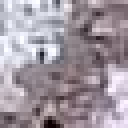

In [43]:
image_to_select = rand(1:size(train_X)[2])
a = reshape_image_array_reverse(train_X[:, [image_to_select]])
a2 = a[:,:,:,1]
a3 = permuteddimsview(a2, [3, 1, 2])
a3 = Array{Float32}(a3)
println("Ground truth ", train_Y[1, image_to_select])
println("Prediction ", Int(predicts[1, image_to_select]))
println("Filename ", df[image_to_select, 1])
colorview(RGB, a3)